In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
image = cv2.imread('./images/castara.jpeg')

B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(1280, 960)
(1280, 960)
(1280, 960)


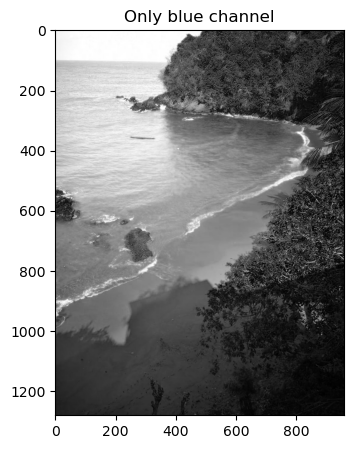

In [5]:
imshow(title='Only blue channel', image=B, size=5)

In [18]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")
print(zeros)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


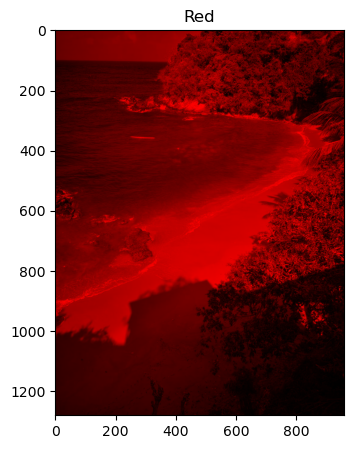

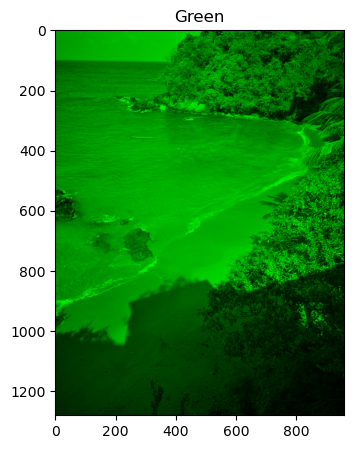

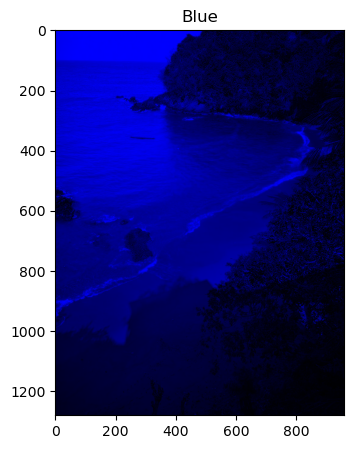

In [20]:
imshow("Red", cv2.merge([zeros, zeros, R]),size=5)
imshow("Green", cv2.merge([zeros, G, zeros]),size=5)
imshow("Blue", cv2.merge([B, zeros, zeros]),size=5)

In [39]:
def display_color_channel(image, channel, size=1):
    # Split the image into individual color channels
    b, g, r = cv2.split(image)

    # Create a blank image with zeros
    zeros = np.zeros(image.shape[:2], dtype="uint8")

    # Display the selected color channel
    if channel == 'red':
        channel_image = cv2.merge([zeros, zeros, r])
    elif channel == 'green':
        channel_image = cv2.merge([zeros, g, zeros])
    elif channel == 'blue':
        channel_image = cv2.merge([b, zeros, zeros])
    else:
        raise ValueError("Invalid color channel. Please choose 'red', 'green', or 'blue'.")

    # Resize the image while maintaining aspect ratio
    if size is not None:
        aspect_ratio = image.shape[1] / image.shape[0]
        # new_width = int(size * aspect_ratio)
        # resized_image = cv2.resize(channel_image, (new_width, size))
        plt.figure(figsize=(size * aspect_ratio, size))
    # else:
    #     resized_image = channel_image

    # Show the image using matplotlib
    plt.imshow(cv2.cvtColor(channel_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{channel.capitalize()} Channel")
    plt.axis('off')
    plt.show()

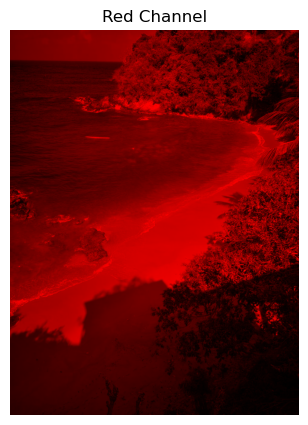

In [38]:
display_color_channel(image=image, channel='red', size=5)

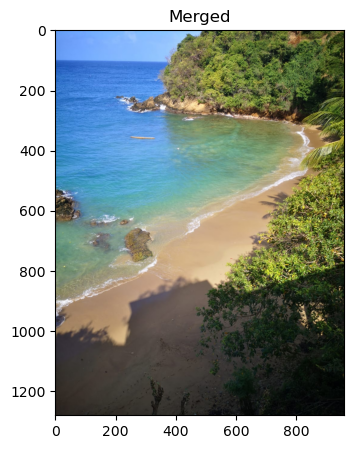

In [24]:
image = cv2.imread('./images/castara.jpeg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image, 
merged = cv2.merge([B, G, R]) 
imshow("Merged", merged, size=5) 

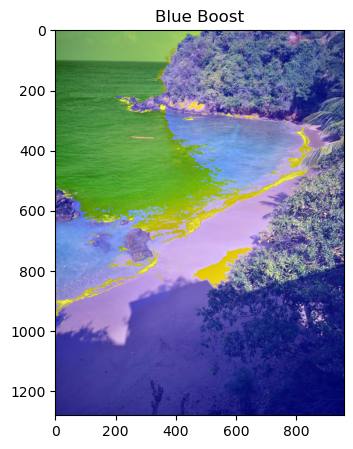

In [40]:
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged, size=5)

hsv color space: 
hue: 0-179
saturation: 0-255
value intensity: 0-255

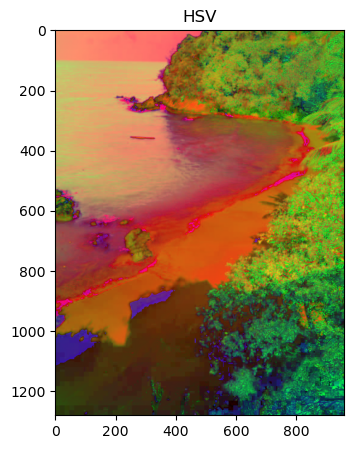

In [42]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image, size=5) # broken image output because the plot function was designed for rgb

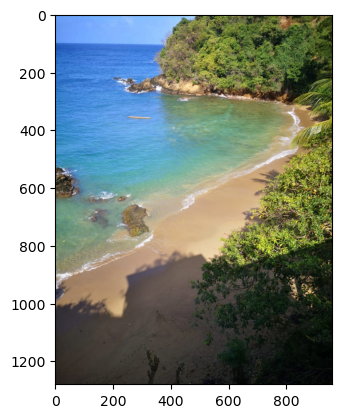

In [43]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

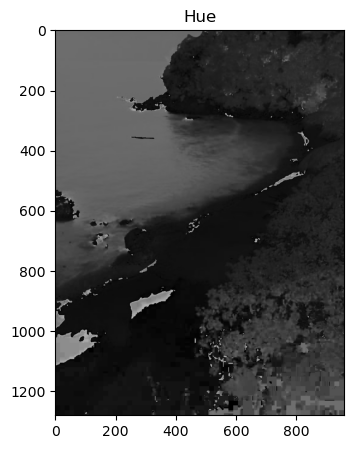

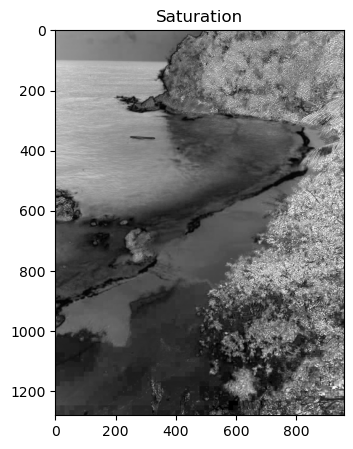

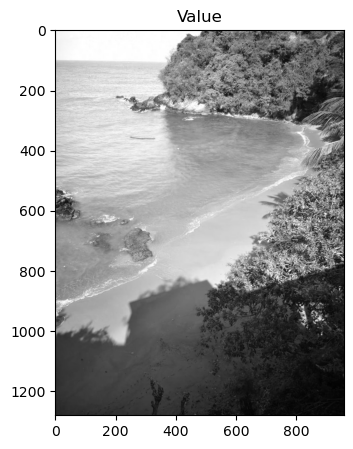

In [45]:
imshow("Hue", hsv_image[:, :, 0], size=5)
imshow("Saturation", hsv_image[:, :, 1], size=5)
imshow("Value", hsv_image[:, :, 2], size=5)